# AutoKeras MNIST 辨識

In [51]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


In [52]:
# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


In [53]:
import autokeras as ak

# 初始化影像分類器(image classifier)
model = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# 訓練模型
model.fit(x_train, y_train, epochs=10)


Trial 1 Complete [00h 01m 52s]
val_loss: 0.038410965353250504

Best val_loss So Far: 0.038410965353250504
Total elapsed time: 00h 01m 52s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1594 - accuracy: 0.9516
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0745 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0605 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0359 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0340 - accuracy: 0.9892


In [54]:
# 預測
predicted_y = model.predict(x_test)

# 評估，打分數
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9881
[0.03469261899590492, 0.988099992275238]


In [55]:
# 比較 20 筆
print('prediction:', ' '.join(predicted_y[0:20].ravel()))
print('actual    :', ' '.join(y_test[0:20].astype(str)))


prediction: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4
actual    : 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4


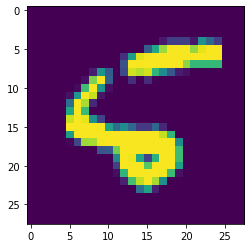

In [57]:
# 顯示錯誤的資料圖像
import matplotlib.pyplot as plt

X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [59]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

X_ALL = np.empty((0, 28, 28))
for i in range(10): 
    image1 = io.imread(f'./myDigits/{i}.png', as_gray=True)
    #image1 = Image.open(uploaded_file).convert('LA')
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    # 反轉顏色
    # 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
    # 還原特徵縮放
    X1 = (np.abs(1-X1) * 255).astype(int)
    X_ALL = np.concatenate([X_ALL, X1])
predictions = model.predict(X_ALL)
print(predictions)

[['0']
 ['1']
 ['2']
 ['3']
 ['4']
 ['5']
 ['6']
 ['7']
 ['8']
 ['9']]
